<a href="https://colab.research.google.com/github/warrengmatin/CSEE_903_GroupProject/blob/main/Setup_Project_in_Github_Repo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Clone Github Repo

In [27]:
from google.colab import userdata
import os

# Path to the directory you want to delete
dir_path = '/content/CSEE_903_GroupProject'

# Deleting the directory
if os.path.isdir(dir_path):
  !rm -rf {dir_path}

%cd /content/
!git clone https://github.com/warrengmatin/CSEE_903_GroupProject.git
%cd {dir_path}

print('List files: ', os.listdir())

/content
Cloning into 'CSEE_903_GroupProject'...
remote: Enumerating objects: 110, done.
remote: Counting objects: 100% (110/110), done.
remote: Compressing objects: 100% (94/94), done.
remote: Total 110 (delta 35), reused 60 (delta 12), pack-reused 0
Receiving objects: 100% (110/110), 26.42 MiB | 27.97 MiB/s, done.
Resolving deltas: 100% (35/35), done.
/content/CSEE_903_GroupProject
List files:  ['Demo.ipynb', 'LICENSE', '.git', 'cough_segmentation_project', 'Setup_Project_in_Github_Repo.ipynb', 'README.md']


# Load Audio File


******************************

A. Data Loading

******************************

Enter: 
 1. Upload Audio Test File in .wav format 
 2. Run test with sample audio files 

2
Loading the audio file: ffc99580-678c-46c3-8e3f-c2a19916657d.wav
Loading the audio file: 2e9f905a-697c-48db-883e-7e905873172f.wav
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload

******************************

B. Create 1024 Frame Size

******************************

Frame size 1024, hop_length 512, count 441
Hop Length: 512


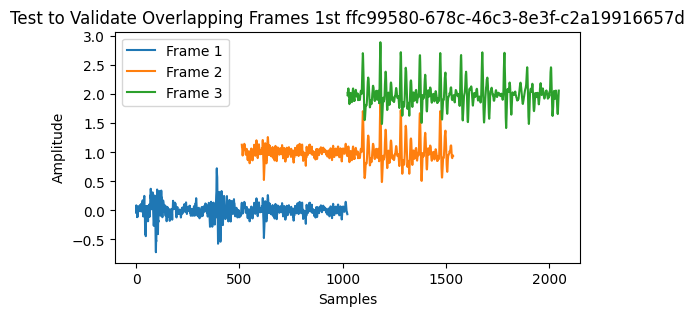

Hop Length: 512


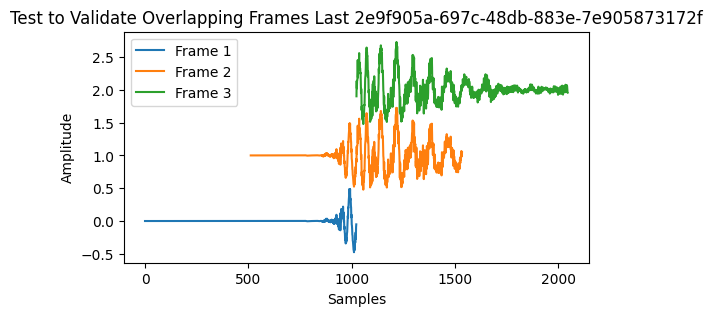

In [29]:
from google.colab import files
import librosa
import numpy as np
import pandas as pd

path_dir = "cough_segmentation_project/cough_segmentation_package/"
path_utils = f"{path_dir}utils/"
path = f"{path_dir}data/saved/"

def get_audio_files( path ):
  x = int(input("Enter: \n 1. Upload Audio Test File in .wav format \n 2. Run test with sample audio files \n\n"))
  files = []
  if x == 1:
    print("Select an Audio File in wav format")
    uploaded = files.upload()
    # Assume the uploaded file is named 'audio_file.wav'
    files.append( list(uploaded.keys())[0] )
  else:
    for filename in os.listdir(path):
      if filename.endswith('.wav'):
          files.append(os.path.join(path, filename))

  if len(files):
    dic = {"key":[], "amp":[], "sf":[], "cough_start_end":[], "label":[]}
    for file_name in files:
      # Extract the file name
      file_name_only = os.path.basename(file_name)

      print(f'Loading the audio file: {file_name_only}')

      # Extract the file name without the extension
      if os.path.splitext(file_name_only)[1] == '.wav':
        file_name_only = os.path.splitext(file_name_only)[0]
        amp, sf = librosa.load(file_name, sr=None)
        sf_resampled = 16000
        amp_resampled = librosa.resample(amp, orig_sr=sf, target_sr=sf_resampled)
        dic["key"].append(file_name_only)
        dic["amp"].append(amp_resampled)
        dic["sf"].append(sf_resampled)
        dic["label"].append( list(np.zeros(amp_resampled.shape[0])) )
        dic["cough_start_end"].append(None)
      else:
        print("Only wav format are accepted\n")

    df = pd.DataFrame(dic)
    df.set_index('key', inplace=True)
    return df
  else:
    print("No file found")

print("\n******************************\n")
print("A. Data Loading")
print("\n******************************\n")
dfl = get_audio_files(path=path)

%load_ext autoreload
%autoreload 2

import sys
sys.path.append(path_utils)

print("\n******************************\n")
print("B. Create 1024 Frame Size")
print("\n******************************\n")
from framing import Framing
frame = Framing()
df_frame = frame.apply_framing(audio_df=dfl, frame_sizes=[1024])[1024]
visual_set = {"1st":df_frame.head(1)["key"].values[0],"Last":df_frame.tail(1)["key"].values[0]}
frame.visualize_overlapping_frames(title='Test to Validate Overlapping Frames', framed_df=df_frame, visual_set=visual_set, figsize=(6,3))


print("\n******************************\n")
print("C. Model Prediction")
print("\n******************************\n")
import joblib
x = int(input("Enter: \n 1. Spectrogram with CNN \n 2. Mel-spectrogram with CNN \n 3. MFCC, ZCR & RMS with Logistic Regression \n\n"))
files = []
if x < 3:
  import tensorflow as tf
  from sono_test_nn_model import SonoTestNNModel
  sono_test_nn = SonoTestNNModel()

  if x == 1:
    model_path = f"{path}cnn_model_spectrogram_dropout_7_batch784_epoch10.h5"
  else:
    model_path = f"{path}cnn_model_melspectrogram_drop5_5_batch784_epoch10.h5"

  # Load the model
  cnn = tf.keras.models.load_model(model_path)
  # Display the model architecture
  #cnn.summary()
  if x == 1:
    sono_test_nn.predict_nn(cnn, df_frame, debug=False)
  else:
    sono_test_nn.predict_nn(cnn, df_frame, percent_proba=0.5, key='mel', debug=False)

else:


In [ ]:

import IPython.display as ipd
ipd.Audio(amp_resampled, rate=sf_resampled)